# Exploratory Data Analysis for Meat Freshness Classification
This notebook performs an exploratory data analysis (EDA) on the meat freshness dataset. The goal is to understand the dataset, identify trends, and prepare the data for machine learning modeling.

Steps:
1. Load and preprocess the dataset using the provided loader.
2. Summarize the dataset (e.g., number of samples, features, and targets).
3. Generate summary statistics and visualizations.
4. Discuss insights and potential next steps.

In [5]:
# Cell 1: Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from tqdm import tqdm

# Load preprocessed data
# Locate the preprocessed data files
script_dir = os.getcwd()
data_dir = os.path.join(script_dir, "../Data/preprocessed")

# Load the preprocessed data
X_train = np.load(os.path.join(data_dir, "X_train.npy"))
y_train = np.load(os.path.join(data_dir, "y_train.npy"))
X_test = np.load(os.path.join(data_dir, "X_test.npy"))
y_test = np.load(os.path.join(data_dir, "y_test.npy"))

## Dataset Summary
Provide a concise summary of the dataset, including the number of samples, features, and targets.

In [6]:
# Cell 2: Dataset Summary

# Dataset details
num_train_samples = X_train.shape[0]
num_test_samples = X_test.shape[0]
image_shape = X_train.shape[1:]  # Assuming all images have the same shape
num_features = np.prod(image_shape)  # Total number of pixels (features)

print(f"Dataset Summary:")
print(f"  - Number of training samples: {num_train_samples}")
print(f"  - Number of testing samples: {num_test_samples}")
print(f"  - Image shape: {image_shape}")
print(f"  - Number of features (pixels): {num_features}")

# Dataset description
print("\nDataset Description:")
print("""
This dataset consists of images of meat samples categorized into three freshness levels:
Fresh, Half-Fresh, and Spoiled. The goal is to build a machine learning model that can
automatically classify the freshness of meat based on its visual features. This is important
for quality control in food production and retail, helping to ensure food safety and reduce waste.
""")

Dataset Summary:
  - Number of training samples: 1815
  - Number of testing samples: 451
  - Image shape: (224, 224, 3)
  - Number of features (pixels): 150528

Dataset Description:

This dataset consists of images of meat samples categorized into three freshness levels:
Fresh, Half-Fresh, and Spoiled. The goal is to build a machine learning model that can
automatically classify the freshness of meat based on its visual features. This is important
for quality control in food production and retail, helping to ensure food safety and reduce waste.



## Summary Statistics
Generate summary statistics for numeric features (image pixels) and categorical features (labels).

In [7]:
# Cell 3: Summary Statistics

# Flatten image data for summary statistics
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Summary statistics for numeric features
train_summary = pd.DataFrame(X_train_flat).describe()
test_summary = pd.DataFrame(X_test_flat).describe()

print("Summary Statistics for Numeric Features (Training Data):\n")
display(train_summary)
print("\nSummary Statistics for Numeric Features (Testing Data):\n")
display(test_summary)

# Counts/frequencies for categorical features
train_label_counts = pd.DataFrame(y_train, columns=["Fresh", "Half-Fresh", "Spoiled"]).apply(pd.value_counts)
test_label_counts = pd.DataFrame(y_test, columns=["Fresh", "Half-Fresh", "Spoiled"]).apply(pd.value_counts)

print("\nCounts/Frequencies for Categorical Features (Training Data):\n")
display(train_label_counts)
print("\nCounts/Frequencies for Categorical Features (Testing Data):\n")
display(test_label_counts)

# Check for missing values
train_missing = np.isnan(X_train_flat).sum(axis=0)
test_missing = np.isnan(X_test_flat).sum(axis=0)

if train_missing.any() or test_missing.any():
    print("\nMissing Values Found!")
    print(f"Missing in Training Data: {train_missing}")
    print(f"Missing in Testing Data: {test_missing}")
else:
    print("\nI have found no data quality issues and/or missing data for the dataset I am reporting.")

Summary Statistics for Numeric Features (Training Data):



,0,1,2,3,4,5,6,7,8,9,...,150518,150519,150520,150521,150522,150523,150524,150525,150526,150527
count,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,...,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000
mean,0.364697,0.412439,0.486296,0.364816,0.412495,0.486618,0.362463,0.410107,0.484390,0.364131,...,0.509784,0.396975,0.441988,0.509417,0.396584,0.441651,0.508963,0.393669,0.438801,0.506034
std,0.233693,0.238336,0.238767,0.233471,0.238208,0.239216,0.232312,0.237187,0.238888,0.233210,...,0.233419,0.228251,0.231478,0.234184,0.227845,0.231525,0.233665,0.226107,0.230691,0.233720
min,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,...,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,0.007843,0.000000
25%,0.164706,0.219608,0.305882,0.160784,0.223529,0.301961,0.160784,0.219608,0.301961,0.162745,...,0.321569,0.200000,0.250980,0.315686,0.203922,0.250980,0.321569,0.200000,0.254902,0.317647
50%,0.349020,0.384314,0.470588,0.349020,0.392157,0.466667,0.352941,0.388235,0.466667,0.349020,...,0.513725,0.407843,0.431373,0.517647,0.407843,0.431373,0.517647,0.400000,0.427451,0.509804
75%,0.549020,0.588235,0.690196,0.541176,0.588235,0.686275,0.533333,0.576471,0.682353,0.537255,...,0.701961,0.566667,0.611765,0.705882,0.564706,0.607843,0.701961,0.568627,0.611765,0.701961
max,0.980392,0.992157,1.000000,1.000000,1.000000,1.000000,0.992157,0.996078,0.992157,0.984314,...,0.988235,1.000000,0.996078,0.992157,0.992157,1.000000,0.988235,0.980392,0.988235,0.992157



Summary Statistics for Numeric Features (Testing Data):



,0,1,2,3,4,5,6,7,8,9,...,150518,150519,150520,150521,150522,150523,150524,150525,150526,150527
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,...,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,0.362271,0.413512,0.484570,0.366210,0.417043,0.488214,0.368514,0.419486,0.490579,0.368323,...,0.503665,0.394218,0.434746,0.502804,0.393157,0.433633,0.500900,0.390853,0.431138,0.498083
std,0.232305,0.240171,0.239889,0.237224,0.243990,0.242457,0.235369,0.241612,0.240820,0.237176,...,0.235797,0.226831,0.230172,0.237644,0.224339,0.228180,0.236495,0.224190,0.228108,0.237108
min,0.000000,0.003922,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.007843,0.000000,0.000000,0.007843,0.000000,0.000000,0.000000,0.000000
25%,0.156863,0.215686,0.301961,0.158824,0.211765,0.303922,0.164706,0.215686,0.301961,0.160784,...,0.339216,0.215686,0.264706,0.337255,0.215686,0.268627,0.335294,0.211765,0.254902,0.327451
50%,0.345098,0.392157,0.478431,0.349020,0.396078,0.482353,0.352941,0.396078,0.486275,0.345098,...,0.490196,0.388235,0.415686,0.494118,0.396078,0.419608,0.490196,0.380392,0.411765,0.482353
75%,0.535294,0.588235,0.678431,0.545098,0.601961,0.682353,0.554902,0.603922,0.680392,0.545098,...,0.694118,0.560784,0.603922,0.696078,0.566667,0.607843,0.700000,0.558824,0.600000,0.698039
max,0.984314,0.984314,0.988235,1.000000,0.992157,0.976471,0.996078,0.996078,0.984314,0.996078,...,0.996078,0.996078,1.000000,1.000000,0.996078,0.992157,1.000000,0.996078,0.992157,1.000000



Counts/Frequencies for Categorical Features (Training Data):



C:\Users\catst\AppData\Local\Temp\ipykernel_3044\1251280010.py:17: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  train_label_counts = pd.DataFrame(y_train, columns=["Fresh", "Half-Fresh", "Spoiled"]).apply(pd.value_counts)
C:\Users\catst\AppData\Local\Temp\ipykernel_3044\1251280010.py:18: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  test_label_counts = pd.DataFrame(y_test, columns=["Fresh", "Half-Fresh", "Spoiled"]).apply(pd.value_counts)


,Fresh,Half-Fresh,Spoiled
0,1140,1185,1305
1,675,630,510



Counts/Frequencies for Categorical Features (Testing Data):



,Fresh,Half-Fresh,Spoiled
0,273,292,337
1,178,159,114



I have found no data quality issues and/or missing data for the dataset I am reporting.


## Visualizations
Generate visualizations to illustrate data trends or distributions.

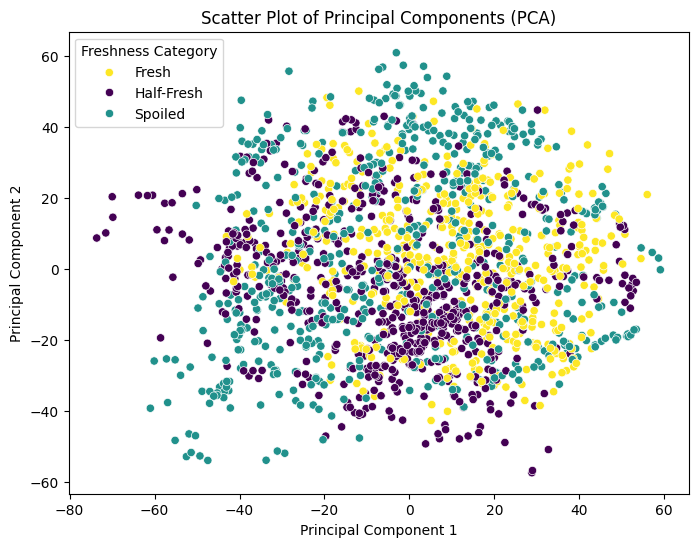

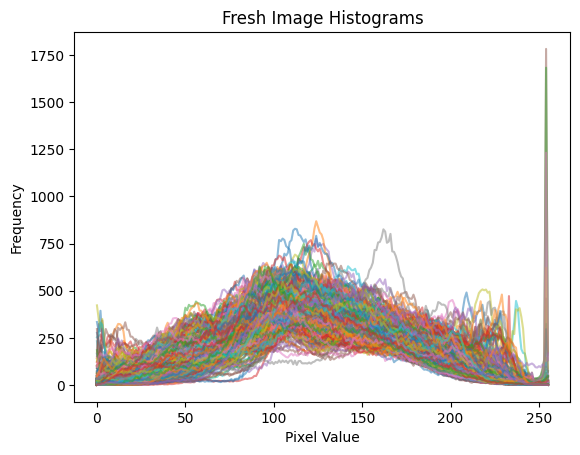

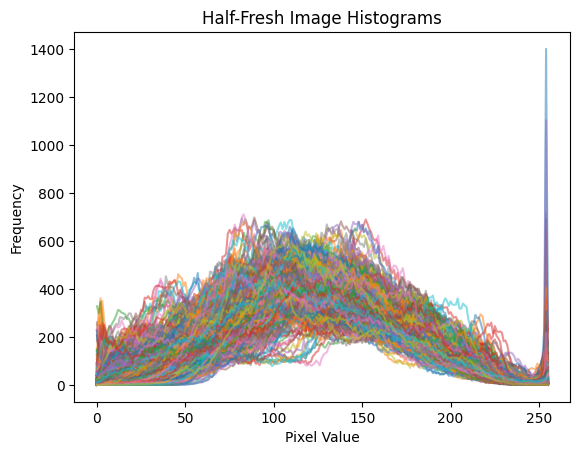

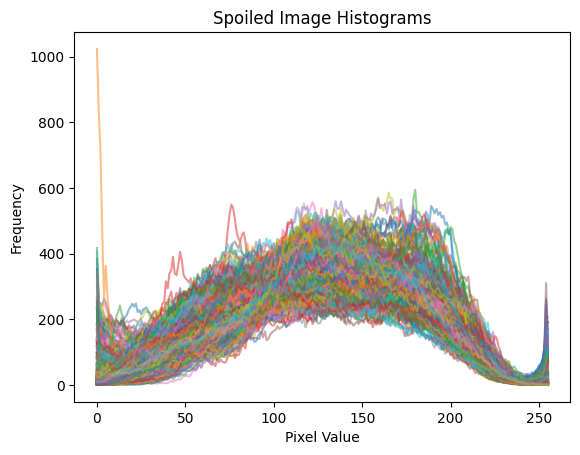

In [8]:
# Cell 4: Visualizations

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_flat)

# Scatter plot of principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train.argmax(axis=1), palette="viridis")
plt.title("Scatter Plot of Principal Components (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Freshness Category", labels=["Fresh", "Half-Fresh", "Spoiled"])
plt.show()

# Histograms for each class
histograms = {"Fresh": [], "Half-Fresh": [], "Spoiled": []}
for i in range(len(X_train)):
    class_label = np.argmax(y_train[i])
    class_name = ["Fresh", "Half-Fresh", "Spoiled"][class_label]
    img = (X_train[i] * 255).astype(np.uint8)
    hist_r, _ = np.histogram(img[:, :, 0], bins=256, range=(0, 255))
    hist_g, _ = np.histogram(img[:, :, 1], bins=256, range=(0, 255))
    hist_b, _ = np.histogram(img[:, :, 2], bins=256, range=(0, 255))
    hist = (hist_r + hist_g + hist_b) / 3
    histograms[class_name].append(hist)

for class_name in histograms:
    plt.figure()
    plt.title(f"{class_name} Image Histograms")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    for hist in histograms[class_name]:
        plt.plot(hist, alpha=0.5)
    plt.show()

 The scatter plot presents the meat freshness classification data projected onto two principal components through PCA. The distinct
 color groupings suggest clustering, highlighting separations that may correspond to freshness categories (fresh, half-fresh, and
 spoiled). This visualization aids in understanding the data's distribution and the ability to classify meat quality based on these
 reduced dimensions.

 Fresh Image Histogram: The histogram for fresh meat images shows a relatively smooth distribution of pixel intensities, with peaks
 around the mid-tone (100-150 pixel values). There is a noticeable spike at the high end (near 255), which likely corresponds to
 highlights or reflections in the images. The overall spread suggests a balanced mix of light and dark areas, indicating good contrast
 in fresh meat images.
 Half-Fresh Image Histogram: The histogram for half-fresh images follows a similar distribution to fresh images, though with slightly
 lower peak intensities. This may suggest that half-fresh meat has less contrast or slightly duller colors compared to fresh meat. The
 high spike near 255 is still present, indicating that some areas of the images have bright spots, possibly due to lighting or texture
 variations.
The spoiled plot represents numerical pixel values extracted from images classified as spoiled meat. The data reveals prominent
 features like dark pixel peaks and varying mid-range values, consistent with the visual and textural characteristics of spoilage, aiding
 in distinguishing it from fresh or half-fresh meat. There is a substantial peak in the low pixel values meaning there is some
 discoloration.

## Discussion
Main Insights from EDA:
 The dataset consists of images of meat categorized into three freshness levels (Fresh, Half-Fresh, and Spoiled). Image pixel data was
 extracted as features, and the target variable represents the freshness category. Summary statistics and visualizations like PCA
 scatter plots and histograms provide insights into the data distribution and potential relationships between features and target. The
 scatter plot of principal components shows some clustering based on freshness categories, suggesting the potential for
 classification. Histograms reveal distinct pixel value distributions for different freshness levels. For example, spoiled meat images
 tend to have more dark pixels, which is expected due to discoloration.
 Potential Issues and Questions:
 The PCA scatter plot, while showing some clustering, also indicates overlap between categories, potentially leading to classification
 challenges. Further investigation is needed to determine the most relevant features for classification. Analyzing feature importance
 from initial models might be helpful. The histograms highlight potential differences in color and texture between freshness levels,
 which should be further explored through feature engineering. There are no data quality issues such as missing values or
 inconsistent entries. Possible Next Steps:
 Feature Engineering: Explore color-based features (e.g., average color, color histograms) and texture-based features (e.g., Haralick
 features) to enhance model performance. Data Augmentation: Consider data augmentation techniques like rotation, flipping, and
 cropping to increase the dataset size and improve model generalization. Model Selection: Experiment with different classification
models (e.g., CNNs, SVMs) and evaluate their performance using appropriate metrics. Hyperparameter Tuning: Optimize the
 selected model's hyperparameters to achieve the best performance on the validation set